In [34]:
from keras import models
from keras import layers

In [35]:
model  = models.Sequential()
#卷积层，参数意义分别为：
#经过这一层之后，特征图的个数，一个卷积核，产生一个特征图，第一层：32，说明有32个卷积核；第二层64，说明在第一层的特征图基础上，每张特征图有两个卷积核进行特征采集
#卷积核大小
#激活函数
#输入大小（只在开始的第一层有，后面不需要）
model.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()                  #查看模型整体情况

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 33856)            

In [49]:
#配置模型的损失函数、优化器、指标名称
from keras import optimizers

model.compile(loss='binary_crossentropy',          #损失函数
optimizer=optimizers.adadelta, #优化器
metrics=['acc'])                                   #指标名称


ValueError: Could not interpret optimizer identifier: <class 'keras.optimizers.Adadelta'>

In [37]:
#图片的训练路径和验证路径
train_dir = r'G:\LearmonthData\New\ceshi\train'
validation_dir = r'G:\LearmonthData\New\ceshi\validation'


In [44]:
#增加数据增强
#生成训练需要的图片和标签
from keras.preprocessing.image import ImageDataGenerator
#将图片大小调整到1以内，原先图片每个像素的格式为uint8，所以要除以255
train_datagen = ImageDataGenerator(
#rescale=1./255,
#rotation_range=40,                #角度随机旋转的范围
width_shift_range=0.2,            #随机水平方向移动的范围（相对）
height_shift_range=0.2,           #随机垂直方向移动的范围（相对）
#shear_range=0.2,                  #错切变换，即矩形变平行四边形  https://blog.csdn.net/ghy_111/article/details/78056441
zoom_range=0.2,                   #图像随机缩放的范围
#horizontal_flip=True,             #一半的图片是经过水平翻转的
)


validation_datagen = ImageDataGenerator(rescale=1)

#根据目录的名称，生成对应的标签
#train_dir有Ⅱ型和Ⅲ型的图片
#每次生成batch_size数量的图片，图片大小为target_size
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(200, 200),              #生成图片的大小
batch_size=30,                       #一次生成图片的数量
class_mode='binary')                 #图片标签的类型

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(200, 200),              #生成图片的大小
batch_size=10,                       #一次生成图片的数量
class_mode='binary')                 #图片标签的类型


Found 1146 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [50]:
#开始训练
history = model.fit_generator(
train_generator,                           #通过生成器传入图片和标签
steps_per_epoch=100,                        #每轮要传入100次，即3000张图片进行训练
epochs=20,                                 #总共训练20轮
validation_data=validation_generator,      #通过生成器传入图片和标签进行验证
validation_steps=14)                       #每轮要传入14次，即140张图片进行验证

Epoch 1/20
100/100 [==============================] - 56s 558ms/step - loss: 0.6932 - acc: 0.4935 - val_loss: 0.6935 - val_acc: 0.4857

KeyboardInterrupt: 

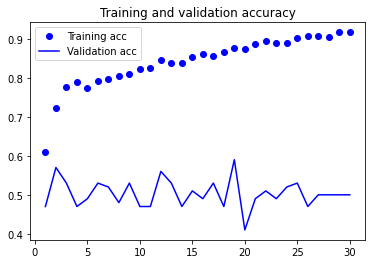

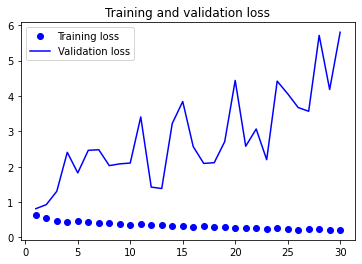

In [19]:
#绘制训练精度、验证精度
#绘制训练损失、验证损失
#python画图库，类似matlab的plot
import matplotlib.pyplot as plt
acc = history.history['acc']             #得到训练的指标数据
val_acc = history.history['val_acc']     #得到验证的指标数据
loss = history.history['loss']           #得到训练损失
val_loss = history.history['val_loss']   #得到验证损失
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()                              #画图例
plt.figure()                              #另一张图
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()                                #画图，最后加上


